<a href="https://colab.research.google.com/github/restiso7788/COVID-19-spread-trend/blob/master/LM_Logistic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#import exper data 
url = "https://raw.githubusercontent.com/sanderlab/CellBox/master/data/expr.csv"
url_exp_node = "https://raw.githubusercontent.com/sanderlab/CellBox/master/data/node_Index.csv"
node = pd.read_csv(url_exp_node, header= None)
node = node.transpose()
df = pd.read_csv(url, header= None)

# 89 perturbation conditions; 
# the columns from 0 to 82 represent for Molecular nodes
# columns 82 to 87 represent for phenotypic nodes
# 99 components connecting perturbations, protein response, and phenotypes to simulate dynamic cellular behaviour

In [ ]:
# append the node as the exper column name
name = node.values.tolist()
df.columns = name
df.shape
df.head()

,4EBP1pS65,RbpS807,MAPKpT202,MEKpS217,S6,PAI-1,AKTpS473,AMPKpT172,b-Catenin,BIM,Caveolin,CyclinB1,CyclinD1,GSK3abpS21,GSKpS9,IGFBP2,p38pT180,p53,p70S6KpT389,SRCpY527,STAT3pY705,TSC2pT1462,YAPpS127,ACC1,AKTpT308,AKT,b-CateninpS,Fibronectin,HSP27,IGF1R-beta,IRS1,p27,c-Myc,SMAD3,STAT3,STAT5,STAT5pY694,COX2,PAX2,PLK1,...,ERa,GATA3,GSK3ab,mTORpS2448,p21,STAT6pY641,TAZpS89,XRCC1,PCNA,PDK1pS241,PI3Kp85,PKCa,RAD51,SRCpY416,4EBP1pT70,ACCpS79,Collagenase,CyclinE1,IRS1pS307,p38,SMAD3pS423,TSC2,SRC,G2M,G1arrest,G2arrest,Sarrest,cellviab,aMEK,aAKT,aHDAC,aMDM2,aJAK,aBRAFm,aPKC,aSTAT3,amTOR,aPI3K,aCDK4,aSRC
0,-0.435,-0.608,-0.855,-0.712,-0.113,-0.089,0.096,0.291,0.428,0.375,0.238,-0.338,-0.559,-0.614,-0.514,0.048,-0.298,0.277,-0.626,-0.306,0.131,-0.283,-0.089,0.056,0.044,-0.333,-0.006,-0.024,0.049,0.022,-0.045,0.315,-0.111,0.032,-0.024,0.116,-0.066,-0.367,0.297,-0.022,...,0.281,0.135,0.040,-0.159,-0.042,0.141,0.092,0.154,0.177,0.103,0.090,0.277,-0.121,-0.076,0.045,0.305,0.201,0.052,0.047,-0.004,0.132,0.024,0.182,0.0,0.563,0.000,0.0,0.242,-0.698,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.308,-0.322,-0.999,-0.594,0.022,-0.061,0.093,0.222,0.255,0.645,-0.420,-0.114,-0.564,-0.520,-0.438,0.391,-0.202,-0.172,-0.585,-0.154,0.000,-0.274,-0.058,-0.083,0.159,-0.273,-0.002,0.173,0.055,0.027,0.166,0.436,-0.312,-0.118,0.405,-0.173,0.001,0.743,0.195,-0.007,...,0.210,-0.042,0.104,-0.116,-0.038,0.090,0.088,0.041,0.056,0.300,0.053,0.147,-0.223,0.121,0.150,0.210,0.081,-0.051,-0.074,-0.015,0.239,-0.024,0.049,0.0,0.000,1.748,0.0,0.431,-0.698,0.0,-0.89,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.402,-0.549,-0.837,-0.675,-0.011,-0.103,0.089,0.418,0.276,0.439,0.084,-0.265,-0.569,-0.500,-0.505,0.092,-0.176,0.343,-0.653,-0.281,0.102,-0.265,0.123,0.100,0.087,-0.147,-0.025,0.002,0.091,0.134,0.017,0.445,-0.255,-0.023,-0.054,0.065,0.009,-0.854,0.173,-0.071,...,0.195,-0.010,0.090,-0.192,-0.091,0.118,0.046,0.028,0.025,0.124,0.066,0.218,-0.198,0.073,0.112,0.307,0.095,0.006,-0.059,0.023,0.109,0.021,0.230,0.0,0.464,0.000,0.0,0.143,-0.698,0.0,0.00,-0.393,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.475,-0.652,-0.935,-0.751,-0.085,-0.019,0.064,0.207,0.147,0.416,0.170,-0.390,-0.541,-0.740,-0.624,0.174,-0.151,0.237,-0.631,-0.289,-0.023,-0.342,-0.049,0.026,-0.080,-0.266,-0.049,0.065,0.081,0.149,0.028,0.410,-0.267,-0.066,-0.080,-0.004,-0.028,-0.509,0.198,-0.148,...,0.175,0.035,-0.013,-0.147,-0.063,0.120,0.063,0.021,0.188,0.098,-0.032,0.183,-0.176,0.115,0.017,0.186,0.120,-0.042,-0.228,-0.068,0.072,-0.024,0.221,0.0,0.532,0.000,0.0,-0.070,-0.698,0.0,0.00,0.000,-0.474,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.611,-1.097,-1.234,-0.928,-0.114,-0.113,-0.002,-0.042,0.277,0.732,0.205,-0.799,-0.829,-0.758,-0.660,0.187,-0.214,0.316,-0.825,-0.236,0.154,-0.337,0.021,0.020,0.010,-0.212,-0.027,0.096,0.154,0.200,-0.127,0.714,-0.409,-0.013,-0.064,0.005,0.020,-0.789,0.256,-0.299,...,0.238,0.016,0.052,-0.210,-0.093,0.116,0.109,0.114,0.120,0.128,0.032,0.236,-0.301,0.052,-0.083,0.174,0.189,0.025,-0.156,-0.048,0.286,0.037,0.282,0.0,0.701,0.000,0.0,0.286,-0.698,0.0,0.00,0.000,0.000,-0.552,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# specify X(D in our document concentration of the drugs were applies) and Y(X in the document)
x = df.iloc[:, -12:]
y1 = df.iloc[:,0]

In [ ]:
# creat training and testing set(70% for training, n = 62 conditions), with same proportation as CellBox
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(62, 12) (62,)
(27, 12) (27,)


In [ ]:
# fit a model(Linear regression for k =1(the first column as the reponse from the data))
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

-0.17574308262811916
[0.26869448 0.48822477 0.06495855 0.31240064 0.0157099  0.07283044
 0.38160921 0.58423799 0.28372758 0.58919713 1.59859129 0.1504939 ]


In [ ]:
# predictions on test data and correlation
y_pred = lm.predict(X_test)
y_pred.shape

(27,)

In [ ]:
# Loop through all response and do the regression
df2 = pd.DataFrame()
X_train.shape
for column in df:
  x = df.iloc[:,-12:]
  y = df.iloc[:,0:87]
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
  lm = LinearRegression().fit(X_train, y_train)
  y_pred = lm.predict(X_test)
  
  df2 = y_pred

In [ ]:
df2.shape

(27, 87)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Correlation between predictions and \n experiments across all conditions')

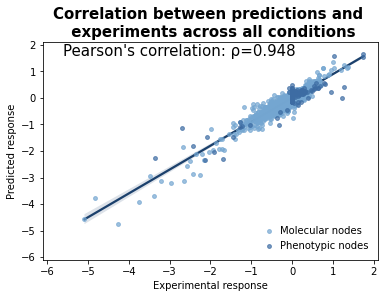

In [ ]:
# Mimic figure 2C
# the columns from 0 to 82 represent for Molecular nodes
# columns 82 to 87 represent for phenotypic nodes
# pearson correlation is 0.948

x_all = y_test.values.flatten()
y_all = df2.flatten()

x_prot = y_test.iloc[:,0:82]
y_prot = df2[:,0:82]
x_pheno = y_test.iloc[:,82:87]
y_pheno = df2[:,82:87]

plt.scatter(x_prot, y_prot, s = 15, alpha = 0.7, color="#74A6D1",zorder=3)
plt.scatter(x_pheno, y_pheno, s = 15, alpha = 0.7, color="#3D6CA3",zorder=4)

plt.legend(["Molecular nodes","Phenotypic nodes"], loc="lower right", frameon=False,
          handletextpad=0.1)
plt.plot([-10, 10], [-10, 10], c = 'white', alpha = 0, ls = '--')

sns.regplot(x_all, y_all, scatter_kws={'s': 15, 'alpha': 0},line_kws={'color': '#1B406C', 'alpha': 1})

plt.xticks(np.arange(-6,3))
plt.yticks(np.arange(-6,3))

lower = np.min([x_all, y_all])
upper = np.max([x_all, y_all])
plt.xlim([lower*1.2, upper*1.2])
plt.ylim([lower*1.2, upper*1.2])

r = np.corrcoef(x_all, y_all)[0][1]
plt.text(x = -5.6, y= 1.6, s='Pearson\'s correlation: ρ=%1.3f'%r,
        size = 15)
plt.xlabel('Experimental response')
plt.ylabel('Predicted response')
plt.title("Correlation between predictions and \n experiments across all conditions", 
          weight='bold', size=15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


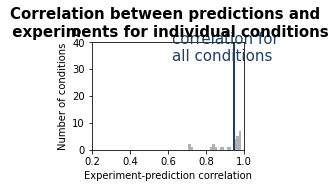

In [ ]:
# Mimic figure 2d

ax = plt.subplot2grid((14, 2), (7, 1), rowspan=8)
x_all = y_test.values
y_all = df2
rs = [np.corrcoef(x_all[i], y_all[i])[0][1] for i in range(y_test.shape[0])]
plt.hist(rs, bins = 22, color = 'grey', alpha = 0.6, rwidth=0.93)
plt.axvline(x = r, linewidth=2, label = 'Median', color="#1B406C")
plt.xlabel('Experiment-prediction correlation')
plt.ylabel('Number of conditions')
plt.xticks([0.2,0.4,0.6,0.8,1.0])
plt.yticks([0,10,20,30,40])
plt.text(0.62,33,"correlation for \nall conditions", color="#1B406C",
        size = 15)
plt.title("Correlation between predictions and \n experiments for individual conditions", 
          weight='bold', size=15)
plt.text(-0.13,1.06,'D', weight='bold',transform=ax.transAxes)

plt.tight_layout()

**Update(07/09/2021)**
1. estimate the parameters for each protein, here is just the example for K =1(done)
2. will summarize every model performance by using correlation of predicitons, minic the figure 2B and 2C from CellBox(done)

3. will check the difference betweent he exper and pert data, looks like the the CellBox paper use the perturbation data to train their model, but all response are zero, still confuse. 

*Comments,*

In cellbox, they repeat 1000 independent random data partitions;
while we only use the raw data with 7:3 split


**Plan for next week(15/09/2021)**
1. Test hypothesis with held out one durg perturbation
  1. need to specify on drug, did the similar step as all drug applied in the model(mimic the same process as the figure2B and C)? Do we need to try every single drug during this step, or just choose one?
2. mimic figure 3C(maybe similar with step1)
3. try to build the non-linear model, did all same step as the LM? Do we need to draw similar figures as before?
4. try different IV analysis package(DoWhy, statsmodels)
